# Tesla Gigafactory in Brandenburg 

### Eine Untersuchung der Einstellung der Anwohner auf Grundlage der Sentiment Analyse von Twitter Daten

##### Vladimir Burlay

In [54]:
library("twitteR")
library("ROAuth")
library("modest")
library("httr")
library("tidyverse")
library("lubridate")
library("twitteR")
library("ROAuth")
library("modest")
library("httr")
library("tidyverse")
library("lubridate")
library("NLP")
library("tm")
library("stringr")
library("RCurl")
library("base64enc")
library("ggplot2")
library("wordcloud")
library("wordcloud2")

In [55]:
rm(list=ls()) # Clear the workspace
graphics.off() # Clear graphics

In [58]:
setwd('C:/Users/Burlay/Desktop/FOM (Studium)/2 Semestr/Analyse semi- unstrukturirte Daten/SB')
projectDir = getwd()

dataDir = file.path(projectDir, 'data')
codeDir = file.path(projectDir, 'R')

hu.liu.pos = scan(file.path(dataDir, 'opinion-lexicon-English', 'positive-words.txt'), what='character', comment.char=';')
hu.liu.neg = scan(file.path(dataDir, 'opinion-lexicon-English', 'negative-words.txt'), what='character', comment.char=';')


In [59]:
# add a few twitter and industry favorites
pos.words = c(hu.liu.pos, 'upgrade')
neg.words = c(hu.liu.neg, 'wtf', 'wait', 'waiting', 'epicfail', 'mechanical')

In [56]:
appname <- "Tesla_Deutschland"
requestURL <- "https://api.twitter.com/oauth/request_token"
accessURL <- "http://api.twitter.com/oauth/request_token"
authURL <- "https://api.twitter.com/oauth/authorize"
consumerKey <- "w0PvfM0RYDOiSE0wt5cGwGvsE"
consumerSecret <- "86ICYBhyAXFJP0ptksNDC84IreCj5ra0wZzaAP9KLv8gnLTfny"
accessToken = "1257760441759039491-DAa9FuFn6i9E5rOGhck6LHMRRfmP9Z"
accessSecret = "mcRPGNHWWO5yd7oyxJoAppu2Yij5ZaiQyo9EbxmT1XCj8"

In [57]:
setup_twitter_oauth(consumer_key = consumerKey,
                    consumer_secret = consumerSecret,
                    access_token = accessToken,
                    access_secret = accessSecret)

[1] "Using direct authentication"


Um die Hashtag-Analyse mit R zu demonstrieren, 
wird hier das Hashtag-Schlüsselwort #GigaBerlin Nummer eins für die Studie ausgewählt.
Abgesehen von diesem Suchschlüsselwort erfordert die Funktion searchTwitter ()
auch die maximale Anzahl von Tweets, die der Funktionsaufruf von den Tweets zurückgibt. 
Betrachten wir für diese Diskussion die maximale Anzahl als 500. 
Abhängig von der Geschwindigkeit Ihres Internets und 
dem Datenverkehr auf dem Twitter-Server erhalten Sie innerhalb
weniger Minuten eine Antwort auf ein R-Listenklassenobjekt und ein R-Listenklassenobjekt

In [60]:
tweets <- searchTwitter("#GigaBerlin" ,lang ="en", n = 500)
mode(tweets)

Warning message in doRppAPICall("search/tweets", n, params = params, retryOnRateLimit = retryOnRateLimit, :
"500 tweets were requested but the API can only return 444"


[1] "list"

In [61]:
length(tweets)

[1] 444

In [62]:
str(head(tweets,1))

List of 1
 $ :Reference class 'status' [package "twitteR"] with 17 fields
  ..$ text         : chr "Good morning #GigaBerlin https://t.co/xvCLDxx9SR"
  ..$ favorited    : logi FALSE
  ..$ favoriteCount: num 0
  ..$ replyToSN    : chr(0) 
  ..$ created      : POSIXct[1:1], format: "2020-05-22 05:07:35"
  ..$ truncated    : logi FALSE
  ..$ replyToSID   : chr(0) 
  ..$ id           : chr "1263697996086153216"
  ..$ replyToUID   : chr(0) 
  ..$ statusSource : chr "<a href=\"http://twitter.com/download/android\" rel=\"nofollow\">Twitter for Android</a>"
  ..$ screenName   : chr "deineglotze"
  ..$ retweetCount : num 0
  ..$ isRetweet    : logi FALSE
  ..$ retweeted    : logi FALSE
  ..$ longitude    : chr(0) 
  ..$ latitude     : chr(0) 
  ..$ urls         :'data.frame':	0 obs. of  4 variables:
  .. ..$ url         : chr(0) 
  .. ..$ expanded_url: chr(0) 
  .. ..$ dispaly_url : chr(0) 
  .. ..$ indices     : num(0) 
  ..and 53 methods, of which 39 are  possibly relevant:
  ..  getCreated, 

In [ ]:
Da der Datenrahmen die effizienteste Struktur für die Verarbeitung von Datensätzen ist,
ist es jetzt erforderlich, jedes Listenelement in den Datenrahmen zu konvertieren und
diese zeilenweise in einen einzelnen Rahmen zu binden.
Dies kann auf elegante Weise mit dem Funktionsaufruf do.call () erfolgen,
wie hier gezeigt:

In [63]:
tweetsDF<- do.call("rbind",lapply(tweets, as.data.frame))

In [ ]:
Die Funktion lapply () konvertiert zuerst jede Liste in einen Datenrahmen, 
dann bindet do.call () diese nacheinander. Jetzt haben wir eine Reihe 
von Datensätzen mit 16 Feldern (eines weniger als die Liste!) 
In einem regulären Format zur Analyse bereit.
Hier werden wir hauptsächlich das "erstellte" Feld betrachten,
um das Verteilungsmuster der Ankunft von Tweets zu untersuchen.

In [64]:
length(head(tweetsDF,1))

[1] 16

In [65]:
str(head(tweetsDF,1))

'data.frame':	1 obs. of  16 variables:
 $ text         : chr "Good morning #GigaBerlin https://t.co/xvCLDxx9SR"
 $ favorited    : logi FALSE
 $ favoriteCount: num 0
 $ replyToSN    : chr NA
 $ created      : POSIXct, format: "2020-05-22 05:07:35"
 $ truncated    : logi FALSE
 $ replyToSID   : chr NA
 $ id           : chr "1263697996086153216"
 $ replyToUID   : chr NA
 $ statusSource : chr "<a href=\"http://twitter.com/download/android\" rel=\"nofollow\">Twitter for Android</a>"
 $ screenName   : chr "deineglotze"
 $ retweetCount : num 0
 $ isRetweet    : logi FALSE
 $ retweeted    : logi FALSE
 $ longitude    : logi NA
 $ latitude     : logi NA


In [66]:
Encoding(tweetsDF$text) <- "UTF8"
tweetsDF$text <- iconv(x = tweetsDF$text,"latin1", "ASCII","")

In [67]:
tweets_DF <- tweetsDF%>%
             mutate(Datum = as_date(tweetsDF$created)) 

In [68]:
length(head(tweets_DF,1))

[1] 17

#### Die Erste Diagram, wie oft tweets angelegt werden

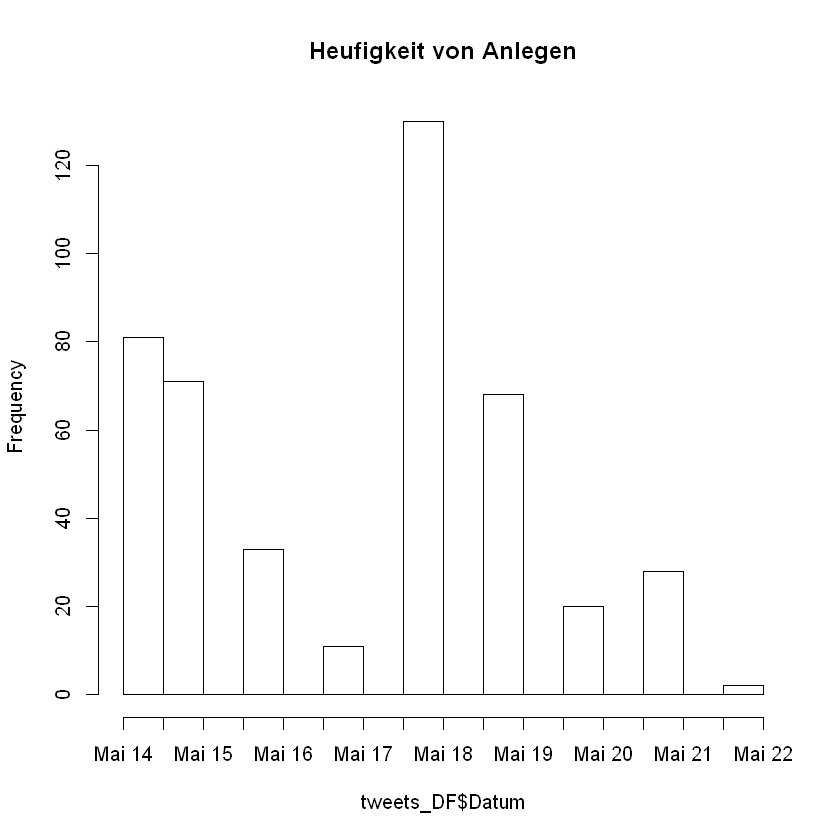

In [69]:
hist(tweets_DF$Datum,breaks=15,freq=TRUE,main="Heufigkeit von Anlegen")

Verktor Ersatz
Diese Verteilung zeigt, dass die Mehrheit der Tweets in dieser Gruppe innerhalb der ersten Sekunden kommt und 
eine viel geringere Anzahl von Tweets in nachfolgenden Zeitintervallen ankommt.
Aus der Verteilung geht hervor, dass die Ankunftszeitverteilung einem Poisson-Verteilungsmuster folgt und es nun möglich ist, 
die Häufigkeit des Auftretens eines Ereignisses in einem bestimmten Zeitintervall zu modellieren.

In [70]:
sorttweetsDF<-tweets_DF[order(as.integer(tweets_DF$Datum)),]
dim(sorttweetsDF) 

[1] 444  17

#### Die zweite Diagram, die Häufigkeit des Auftretens eines Ereignisses in einem bestimmten Zeitintervall

#### Corupt zu anlegen. Corupt ist collection von Texten

convert myCorpus into lowercase

In [71]:
myCorpus <- Corpus(VectorSource(sorttweetsDF$text))

In [73]:
myCorpus <- tm_map(myCorpus, content_transformer(tolower))
myCorpus <- tm_map(myCorpus, function(x) iconv(enc2utf8(x), sub = "byte"))

Warning message in tm_map.SimpleCorpus(myCorpus, content_transformer(tolower)):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(myCorpus, function(x) iconv(enc2utf8(x), :
"transformation drops documents"


löschen punctuation

In [74]:
myCorpus <- tm_map(myCorpus, removePunctuation)

Warning message in tm_map.SimpleCorpus(myCorpus, removePunctuation):
"transformation drops documents"


In [75]:
myCorpus <- tm_map(myCorpus, removeNumbers)

Warning message in tm_map.SimpleCorpus(myCorpus, removeNumbers):
"transformation drops documents"


In [76]:
Textprocessing <- function(x)
{gsub("http[[:alnum:]]*",'', x)
  gsub('http\\S+\\s*', '', x) ## Remove URLs
  gsub('\\b+RT', '', x) ## Remove RT
  gsub('#\\S+', '', x) ## Remove Hashtags
  gsub('@\\S+', '', x) ## Remove Mentions
  gsub('[[:cntrl:]]', '', x) ## Remove Controls and special characters
  gsub("\\d", '', x) ## Remove Controls and special characters
  gsub('[[:punct:]]', '', x) ## Remove Punctuations
  gsub("^[[:space:]]*","",x) ## Remove leading whitespaces
  gsub("[[:space:]]*$","",x) ## Remove trailing whitespaces
  gsub(' +',' ',x) ## Remove extra whitespaces
  gsub("#[A-Za-z0-9]+|@[A-Za-z0-9]+|\\w+(?:\\.\\w+)*/\\S+", "", x)
 }

In [77]:
myCorpus <- tm_map(myCorpus,Textprocessing)

Warning message in tm_map.SimpleCorpus(myCorpus, Textprocessing):
"transformation drops documents"


In [87]:
myCorpus <- tm_map(myCorpus, stripWhitespace)

ERROR: Error in UseMethod("tm_map", x): nicht anwendbare Methode für 'tm_map' auf Objekt der Klasse "character" angewendet


hinzufügen stopwords
stopwords sind Wörter , dich nicht segnifikant

In [81]:
mystopwords <- c(stopwords("english"),"rt","íí","get","like","just","yes","know","will","good","day","people")

In [ ]:
löschen stopwords

In [82]:
myCorpus <- tm_map(myCorpus,removeWords,mystopwords)

Warning message in tm_map.SimpleCorpus(myCorpus, removeWords, mystopwords):
"transformation drops documents"


In [83]:
myCorpus_copy <- myCorpus

In [86]:
for (i in c(1:2, 460)){
  cat(paste0("[", i, "] "))
  writeLines(strwrap(as.character(myCorpus_copy[[i]]), 60))}

[1] gigafactory found updated scaled overview tesla
gigafactories reddit gigaberlin building included now
[2] gigafactory found updated scaled overview tesla
gigafactories reddit gigaberlin building included now
[460] 

ERROR: Error in x$content[[i]]: Indizierung außerhalb der Grenzen


In [85]:
myCorpus <- tm_map(myCorpus, stemCompletion, dictionary=myCorpus_copy)
myCorpus <- Corpus(VectorSource(myCorpus))
myCorpus <- iconv(x = myCorpus,"latin1","UTF-8",sub = "")
myCorpus <- iconv(x = myCorpus,"UTF-16LE", "UTF-8",sub = "")

Warning message in tm_map.SimpleCorpus(myCorpus, stemCompletion, dictionary = myCorpus_copy):
"transformation drops documents"


In [88]:
tdm <- TermDocumentMatrix(myCorpus_copy,control = list(wordlengths = c(1,Inf)))
tdm

<<TermDocumentMatrix (terms: 376, documents: 444)>>
Non-/sparse entries: 5057/161887
Sparsity           : 97%
Maximal term length: 18
Weighting          : term frequency (tf)

In [50]:
#freq.terms <- findFreqTerms(tdm, lowfreq =  50)
freq.terms <- findFreqTerms(tdm)
head(freq.terms,10) 

[1] "busy"       "generators" "gigaberlin" "looks"      "new"       
 [6] "piling"     "preparing"  "site"       "still"      "tesla"

In [89]:
termFreq <- rowSums(as.matrix(tdm))

In [90]:
df <- data.frame(term = names(termFreq), freq = termFreq)

Filter

In [40]:
v_df <- head(df,10) 

In [92]:
source( file.path(codeDir, 'sentiment.R') )
tesla.scors = score.sentiment(df$term, pos.words, neg.words, .progress='text')
tesla.scors <- tesla.scors%>%
  filter(!score == 0)

  |======================================================================| 100%


In [93]:
df_1 <- tesla.scors%>%
  left_join(df,c("text" = "term"))

In [94]:
m <- as.matrix(tdm)
m_df <- as.data.frame(m)
m_name <- as.data.frame(t(m))
m_df$text <- colnames(m_name)

In [96]:
df_res <- df_1%>%
  left_join(m_df,by = "text")

Warning message:
"Column `text` joining factor and character vector, coercing into character vector"


In [106]:
df_res$datum <- date() 

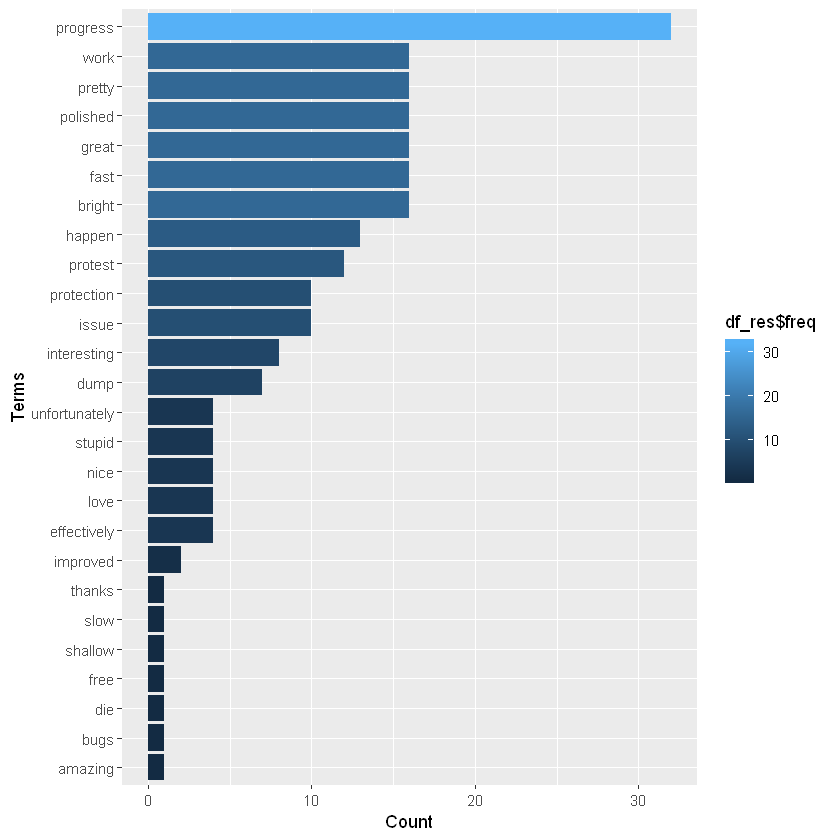

In [100]:
ggplot(df_res,aes(x = reorder(df_res$text, +df_res$freq), y = freq, fill=df_res$freq)) + geom_bar(stat = "identity") +
  scale_colour_gradientn(colors = terrain.colors(10)) + xlab("Terms") + ylab("Count") + coord_flip()

In [101]:
des <- df%>%
        left_join(tesla.scors, c("term" = "text"))%>%
         filter(!is.na(score))
wordcloud2(des , color = "random-dark", backgroundColor = "white")

HTML widgets cannot be represented in plain text (need html)

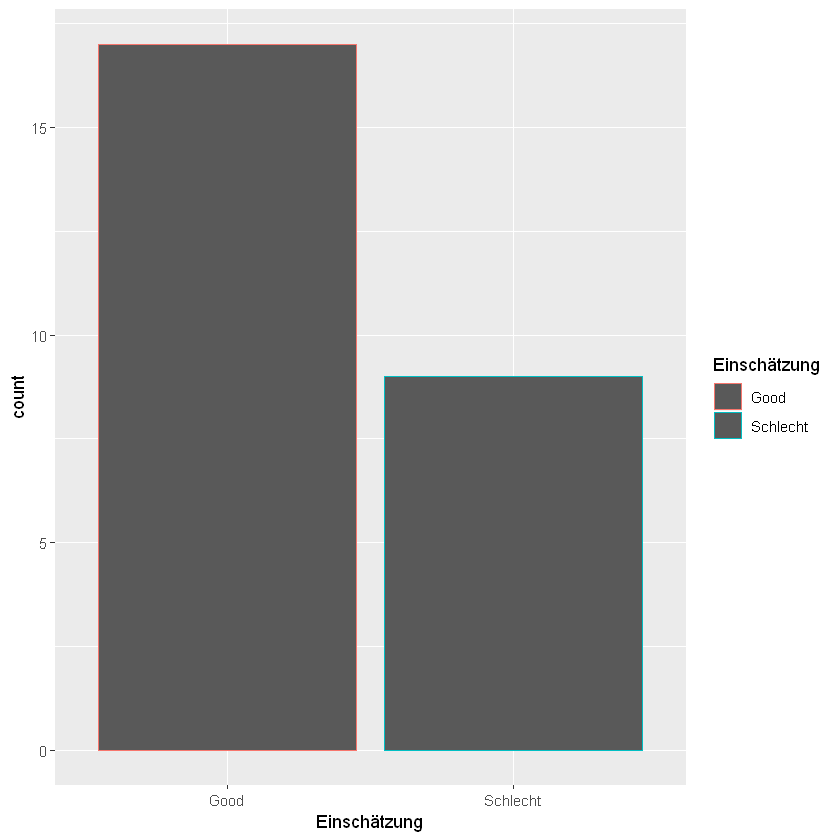

In [102]:
# Ergebnis
df_plot <- select(df_res, score:text)
df_plot$Einschätzung <- ifelse(df_plot$score == 1 ,"Good", "Schlecht")
ggplot(data = df_plot)+
  geom_bar(mapping = aes(x = Einschätzung, color = Einschätzung))